## LESSON 02: FUNDAMENTALS OF ML AND STATISTICAL LEARNING

### 1. Metadata  
####Description
This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.


####Column Descriptions
- **Hours_Studied**	Number of hours spent studying per week.
- **Attendance**: Percentage of classes attended.
- **Parental_Involvement**:	Level of parental involvement in the student's education (Low, Medium, High).
- **Access_to_Resources**:	Availability of educational resources (Low, Medium, High).
- **Extracurricular_Activities**:	Participation in extracurricular activities (Yes, No).
- **Sleep_Hours**: Average number of hours of sleep per night.
- **Previous_Scores**:	Scores from previous exams.
- **Motivation_Level**:	Student's level of motivation (Low, Medium, High).
- **Internet_Access**:	Availability of internet access (Yes, No).
- **Tutoring_Sessions**:	Number of tutoring sessions attended per month.
- **Family_Income**:	Family income level (Low, Medium, High).
- **Teacher_Quality**:	Quality of the teachers (Low, Medium, High).
- **School_Type**:	Type of school attended (Public, Private).
- **Peer_Influence**:	Influence of peers on academic performance (Positive, Neutral, Negative).
- **Physical_Activity**:	Average number of hours of physical activity per week.
- **Learning_Disabilities**:	Presence of learning disabilities (Yes, No).
- **Parental_Education_Level**:	Highest education level of parents (High School, College, Postgraduate).
- **Distance_from_Home**:	Distance from home to school (Near, Moderate, Far).
- **Gender**:	Gender of the student (Male, Female).
- **Exam_Score**:	Final exam score.

In [10]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

### 2. Load Dataset

In [11]:
dataset = pd.read_csv("dataset/StudentsData.csv", skipinitialspace=True)
dataset.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [12]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  6607
#Features =  20


In [13]:
# checking the missing values
dataset[dataset.isnull().any(axis=1)].head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68


In [14]:
# samples with missing values
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  229


Filtering missing values

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


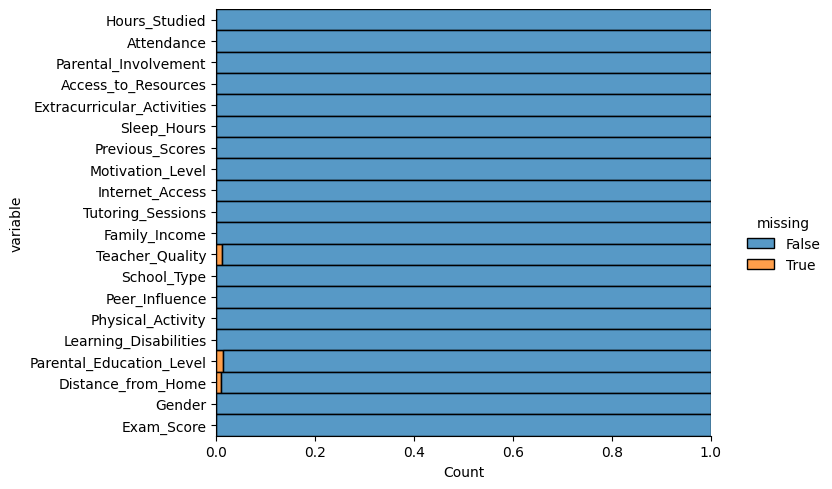

In [15]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

According to the diagram, it can be said that there are very few missing values in the columns Teacher_Quality, Parental_Education_Level, Distance_From_Home

In [16]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  6378


### 3. Descriptive Statistical Analysis

#### Numerical variables

In [17]:
# list of numerical variables
numerical_cols = ["Hours_Studied", "Attendance","Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity", "Exam_Score"]

Histogram with Frequencies

In [18]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)
    plt.show()

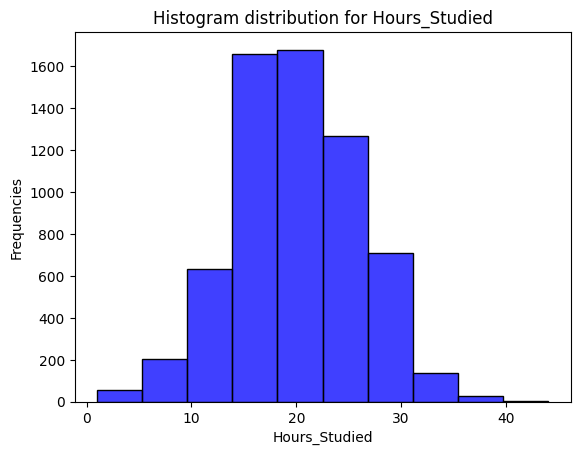

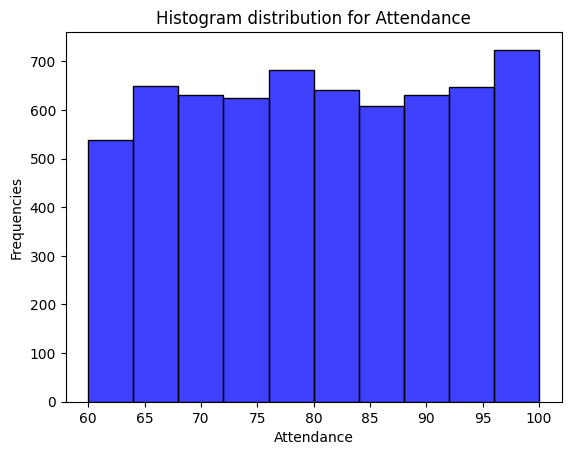

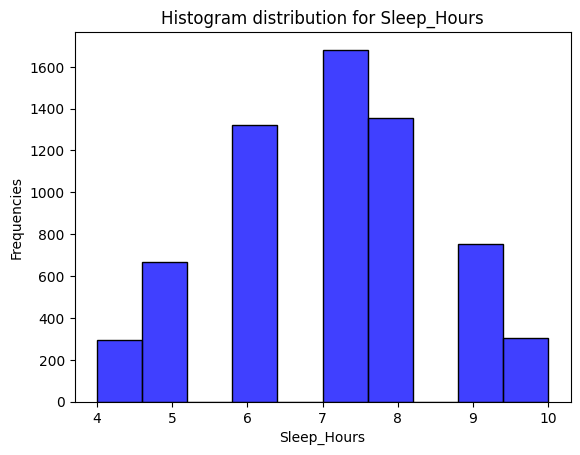

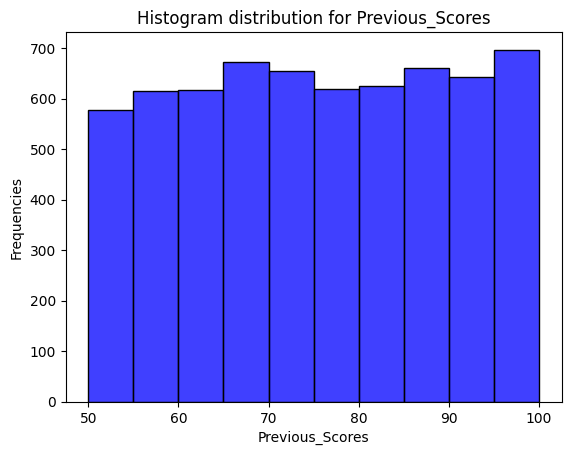

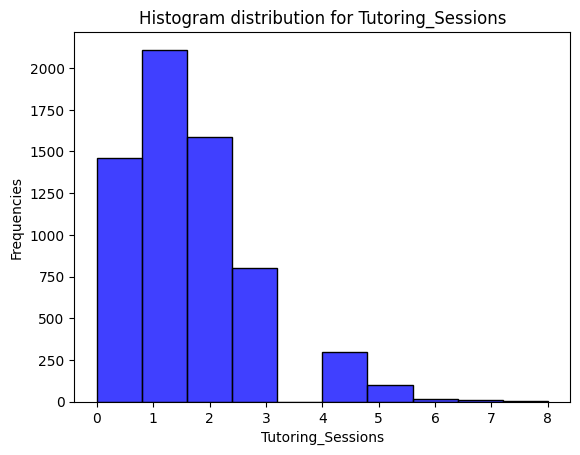

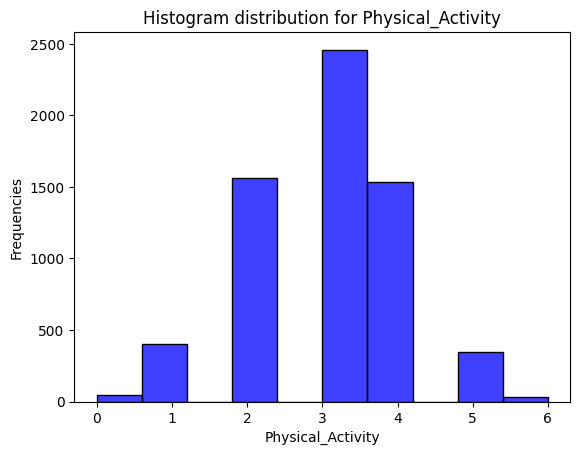

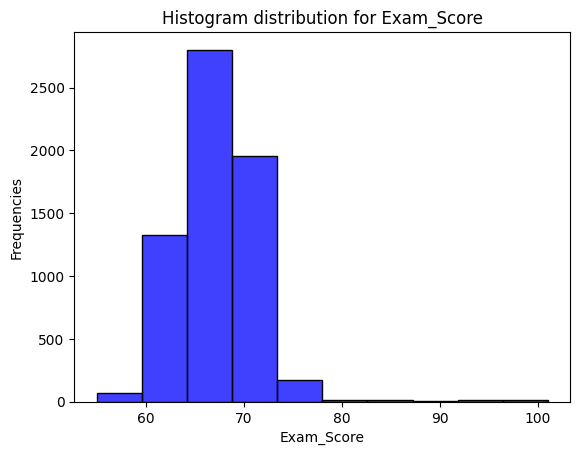

In [19]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

Here are the histograms for all numeric data in the dataset. Explanations to them will be provided below

Histogram with Densities and KDE line (kernel density estimate)

The Kernel Density Estimator provides a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable:  
$$ \hat{f}(x; h) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - X_i) $$  
Where:  
* n: total number of data points
* $X_i$: observed data points
* $K_h$: kernel function scaled by the bandwidth h
$$ K_h(z) = \frac{1}{h} K\left(\frac{z}{h}\right) $$
* $K$: Gaussian Kernel  
$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

In [20]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

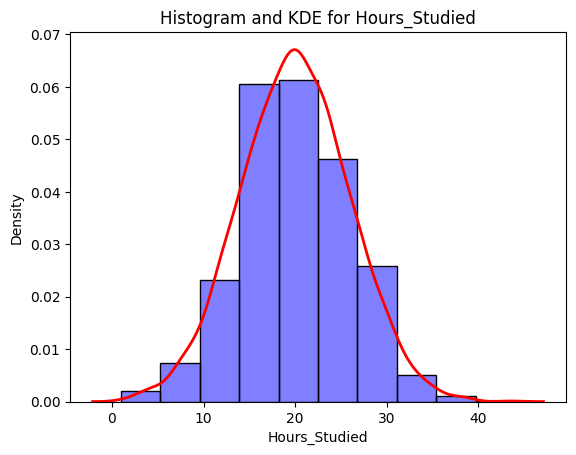

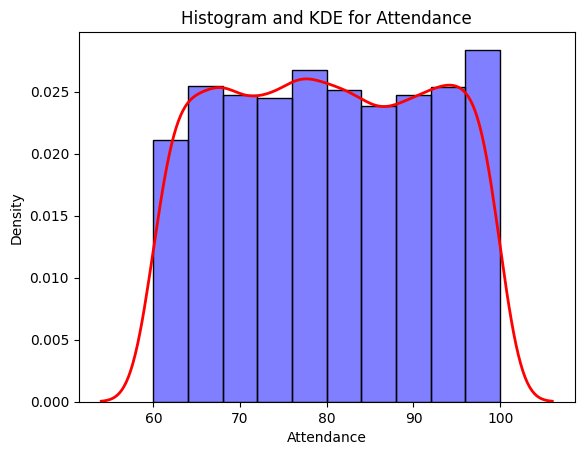

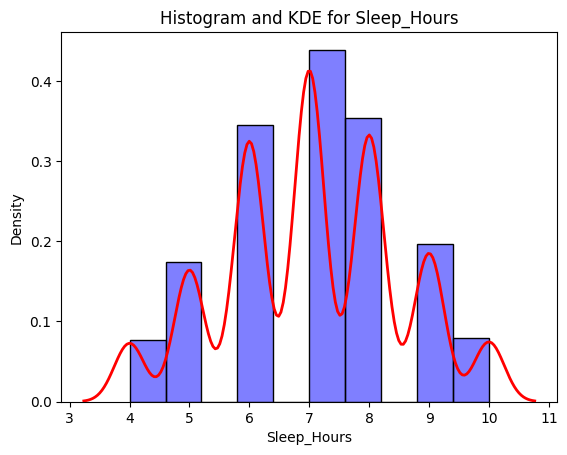

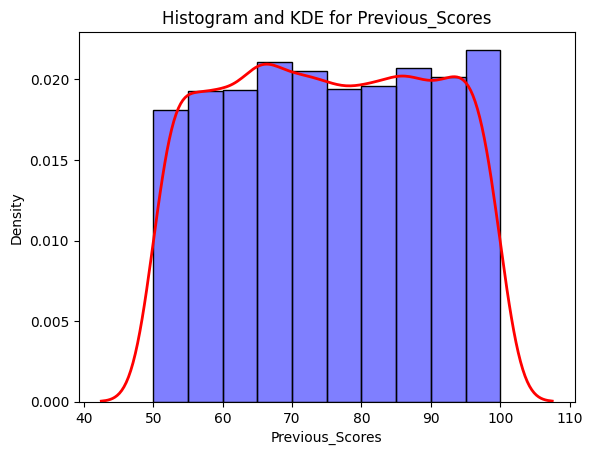

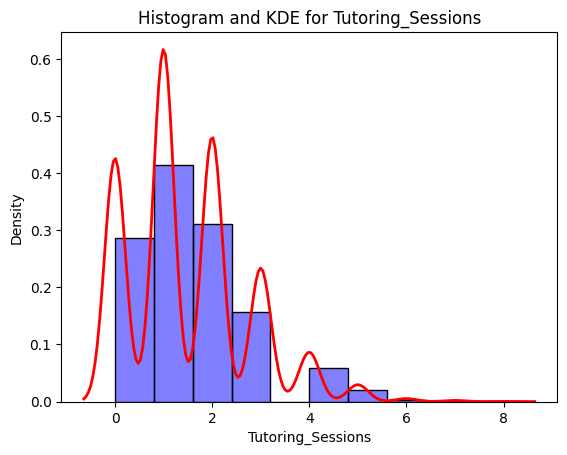

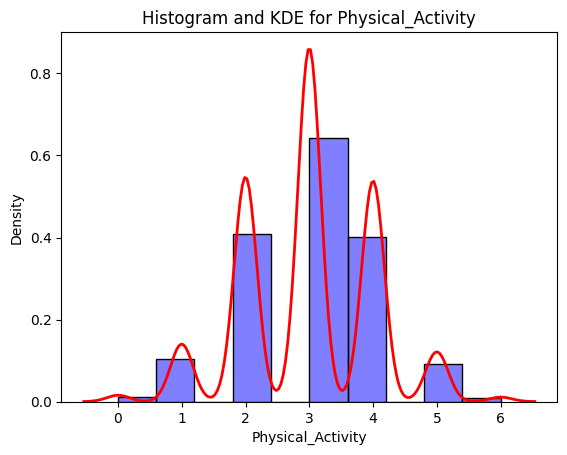

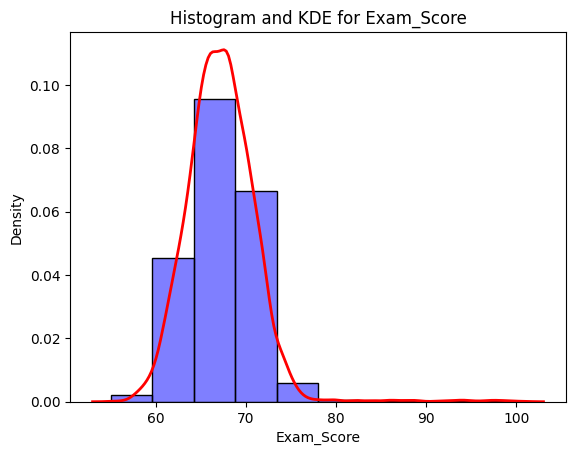

In [21]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

Here are the histograms and KDE for all numeric data in the dataset.

According to them, most students study from 15 to 23 hours a week, attendance varies from 60% to 100%, sleep 6-8 hours, scored from 50 to 100 points for previous exams, about 0-2 hours are devoted to tutorials and 2-4 hours of physical activity, most received 60-70 points for the last exam

Box Plot

In [22]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 2
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

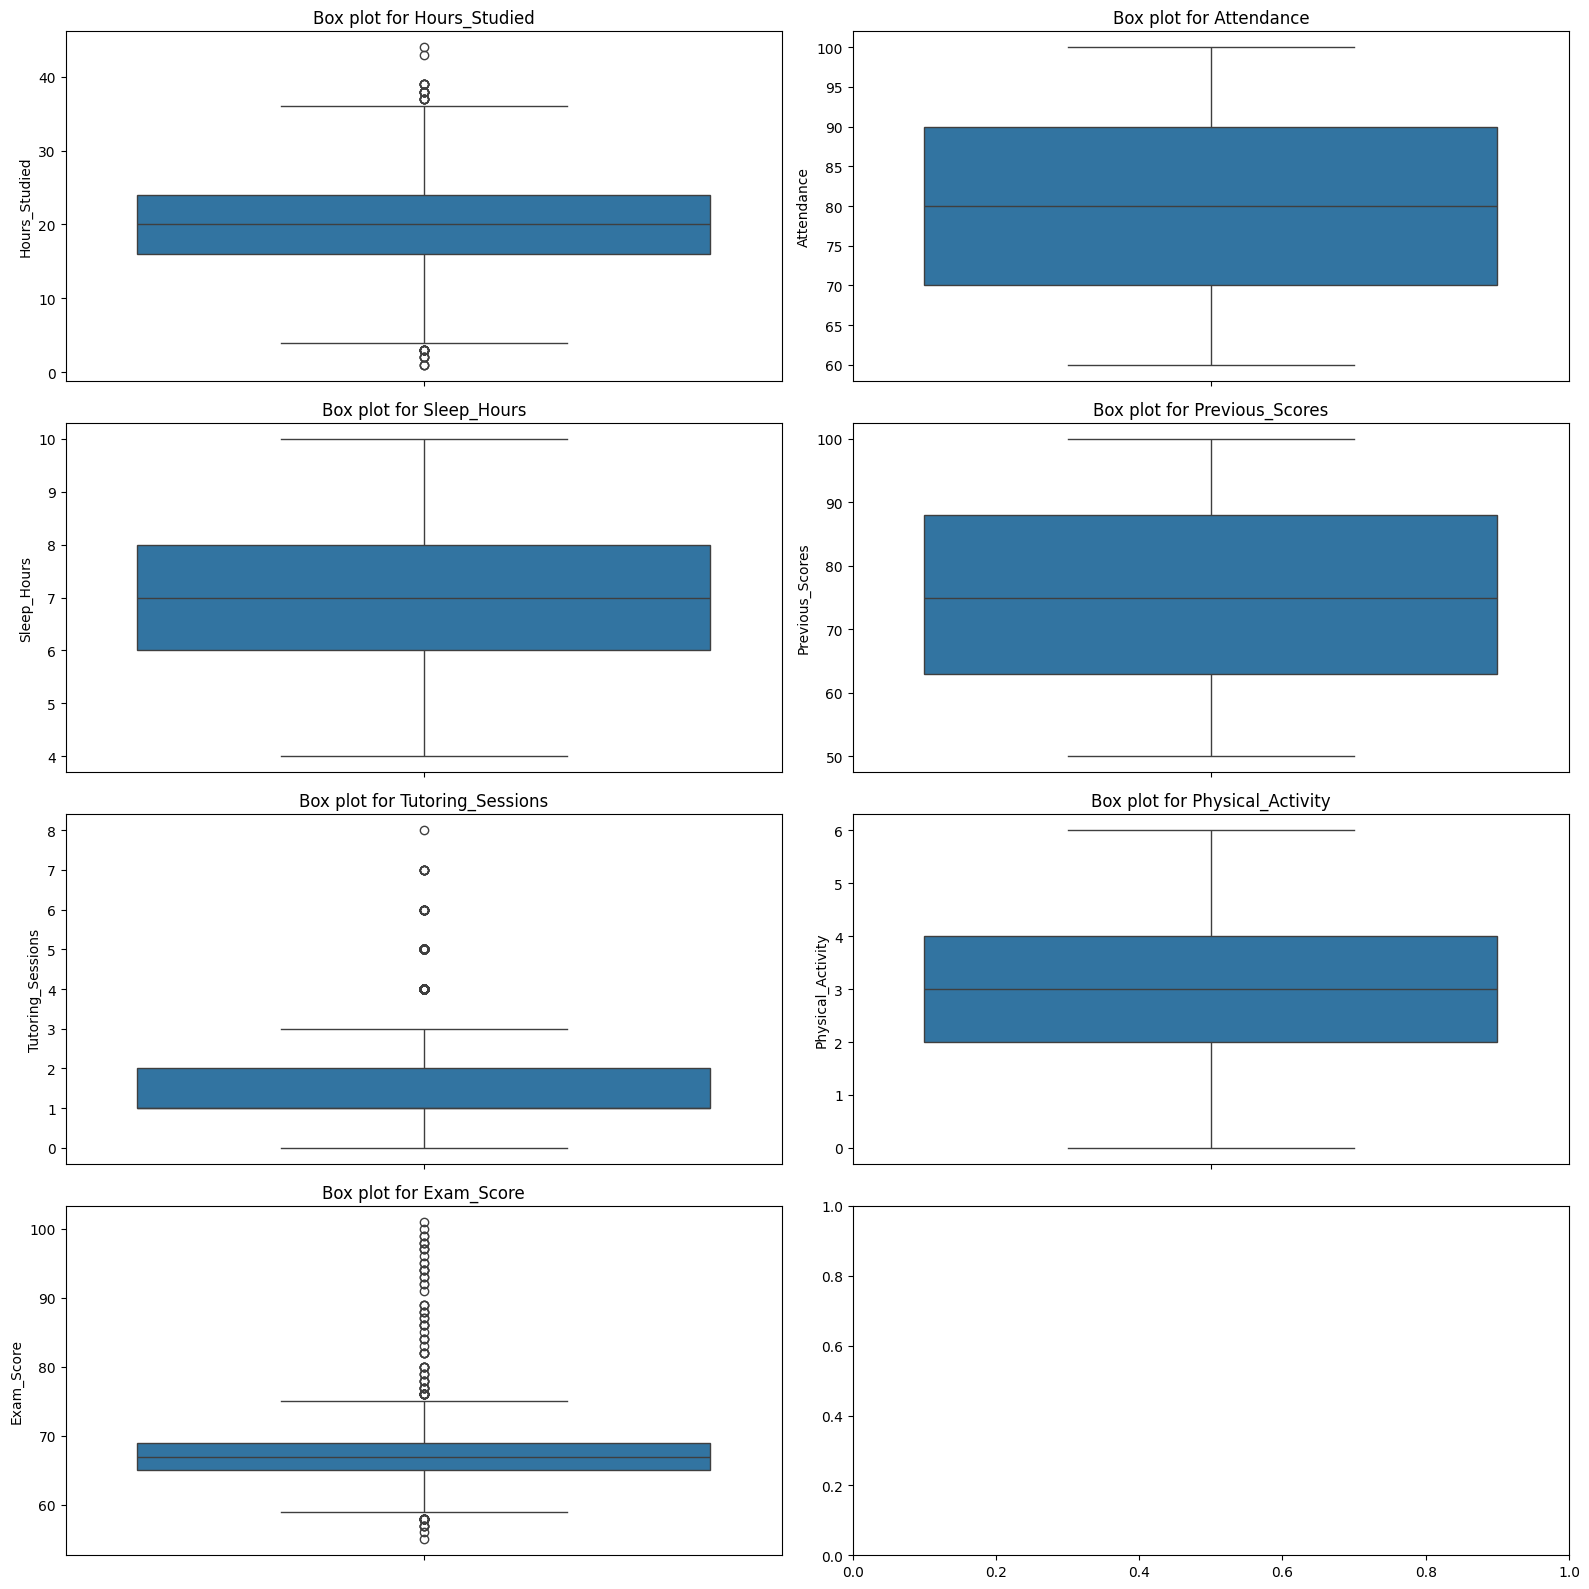

In [23]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

According to these box plots, we can say that the average student studies 20 hours a week, attends 80% of classes, sleeps about 7 hours, and exercises 3 hours a week. He wrote the current exam worse than the previous ones.

Statistical metrics

In [24]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [25]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

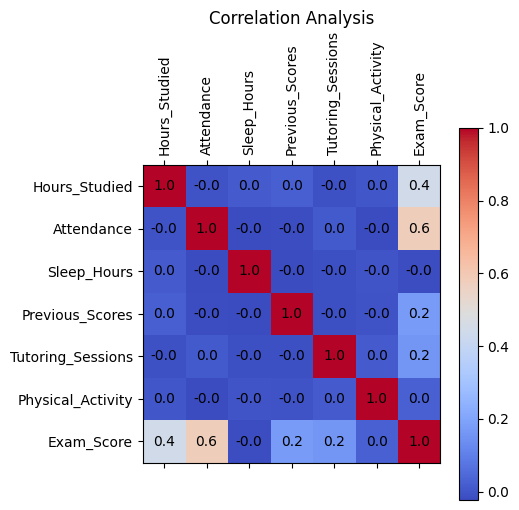

In [26]:
plot_correlation(dataset, numerical_cols)

As a result of the correlation analysis, it can be said that the results of the exam clearly depend on the student's hours of study and attendance

Implications of Low Correlation

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other.
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy.
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.
- **Model Complexity**:  
Low correlation may indicate that the model needs to learn more complex relationships to make accurate predictions.
If features do not provide overlapping information, the model may require more sophisticated techniques (like polynomial regression or interaction terms) to capture the underlying patterns.
- **Feature Selection**:  
In some cases, low-correlation features might be candidates for removal if they do not contribute significantly to the predictive power of the model.

**Outliers detection using Z-Score**  
The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$

In [27]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)

    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

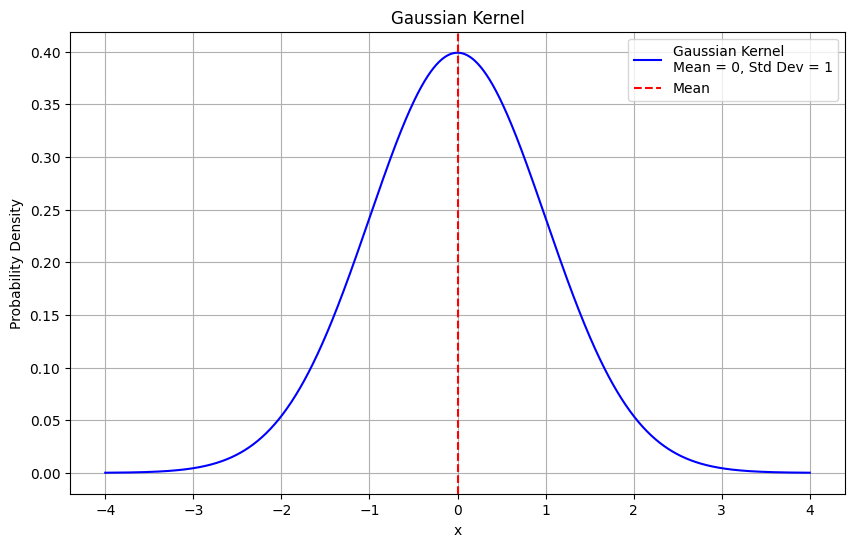

In [28]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [29]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile


In [30]:
call_percentile(z = -2)

2.275

In [31]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)

    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]

    return outliers

In [32]:
outliers_detection(dataset, "Hours_Studied").head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
74,4,100,High,High,Yes,8,60,High,Yes,0,Medium,High,Private,Positive,4,No,College,Moderate,Male,69
113,35,99,High,High,Yes,7,85,Low,Yes,2,Medium,High,Private,Neutral,2,No,Postgraduate,Near,Female,79
125,33,70,Medium,Medium,Yes,6,82,Low,Yes,1,Low,High,Public,Neutral,4,No,College,Near,Male,69
179,36,71,Medium,Medium,Yes,6,56,Medium,Yes,2,High,Medium,Public,Positive,2,No,High School,Far,Male,69
209,43,86,High,Medium,Yes,7,97,Medium,Yes,2,Medium,High,Public,Positive,1,No,High School,Near,Female,78


In [33]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Hours_Studied ***
#samples outlier to distribution = 239
%outliers = 3.75 %

*** Outliers detection in Attendance ***
#samples outlier to distribution = 164
%outliers = 2.57 %

*** Outliers detection in Sleep_Hours ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in Previous_Scores ***
#samples outlier to distribution = 127
%outliers = 1.99 %

*** Outliers detection in Tutoring_Sessions ***
#samples outlier to distribution = 127
%outliers = 1.99 %

*** Outliers detection in Physical_Activity ***
#samples outlier to distribution = 75
%outliers = 1.18 %

*** Outliers detection in Exam_Score ***
#samples outlier to distribution = 265
%outliers = 4.15 %


#### Categorical Variables

In [34]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['Parental_Education_Level',
 'Access_to_Resources',
 'Teacher_Quality',
 'Motivation_Level',
 'Extracurricular_Activities',
 'Learning_Disabilities',
 'Internet_Access',
 'Gender',
 'Parental_Involvement',
 'School_Type',
 'Distance_from_Home',
 'Peer_Influence',
 'Family_Income']

Count instances for each categorical column

In [35]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** Parental_Education_Level ******
Parental_Education_Level
High School     3159
College         1939
Postgraduate    1280
Name: count, dtype: int64

***** Access_to_Resources ******
Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64

***** Teacher_Quality ******
Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64

***** Motivation_Level ******
Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64

***** Extracurricular_Activities ******
Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64

***** Learning_Disabilities ******
Learning_Disabilities
No     5710
Yes     668
Name: count, dtype: int64

***** Internet_Access ******
Internet_Access
Yes    5893
No      485
Name: count, dtype: int64

***** Gender ******
Gender
Male      3688
Female    2690
Name: count, dtype: int64

***** Parental_Involvement ******
Parental_Involvement
Medium    3251
High     

Bar chart - Analysis of absolute frequencies

In [36]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

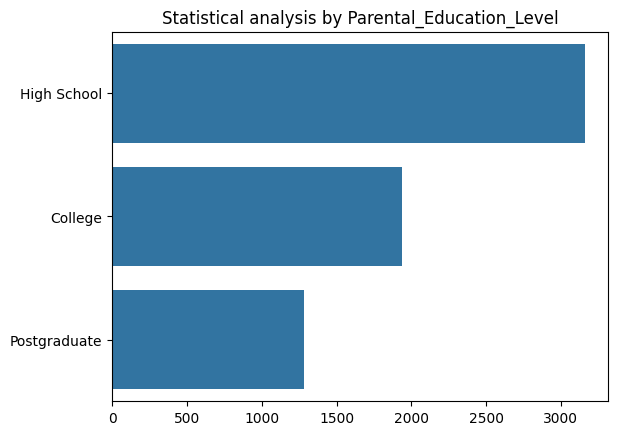

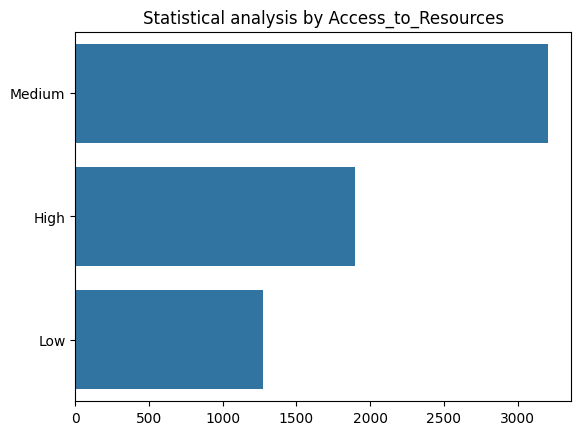

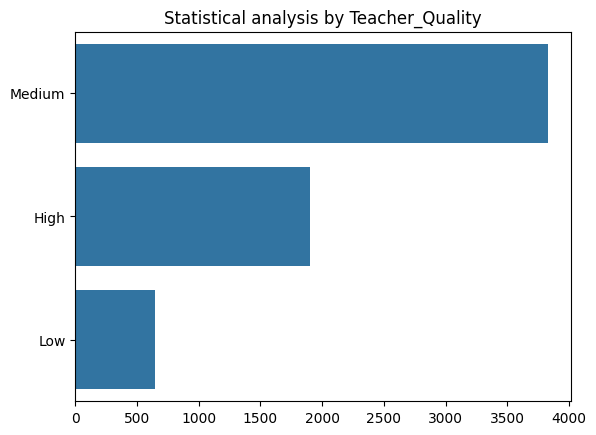

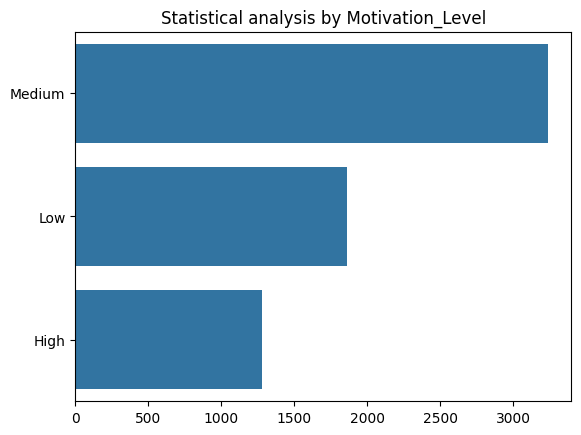

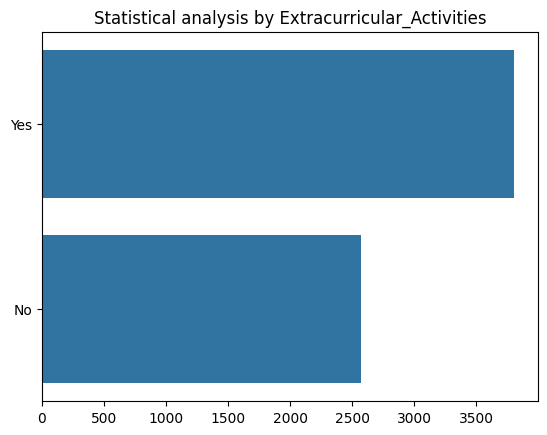

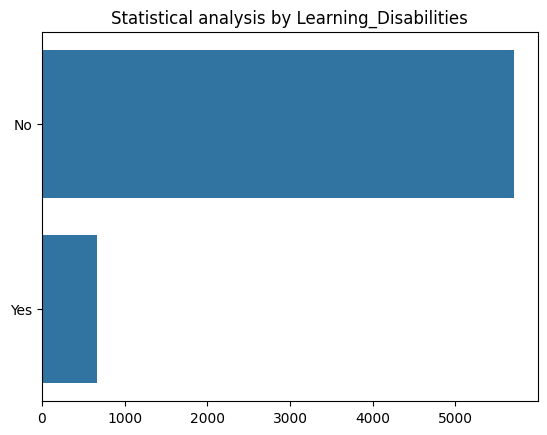

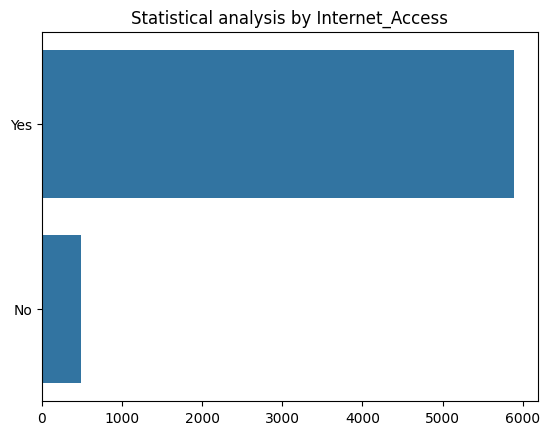

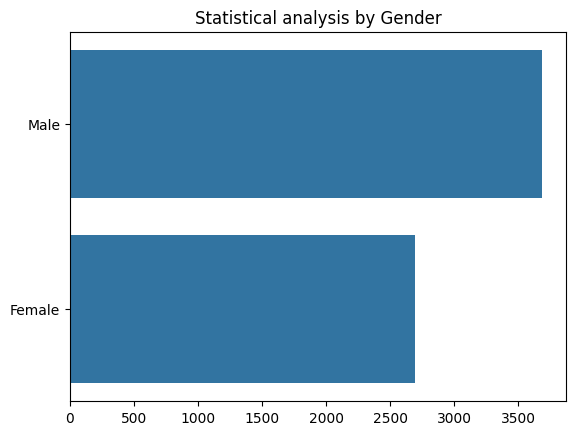

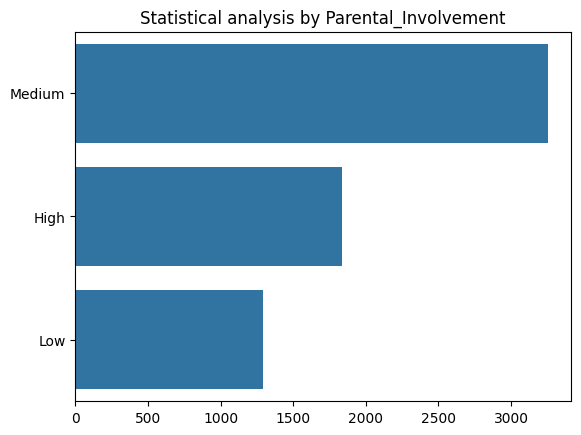

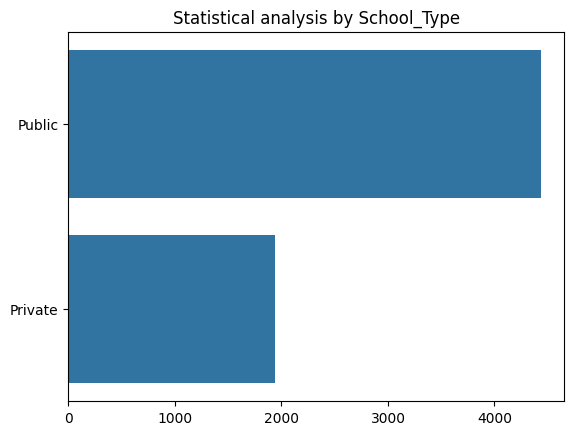

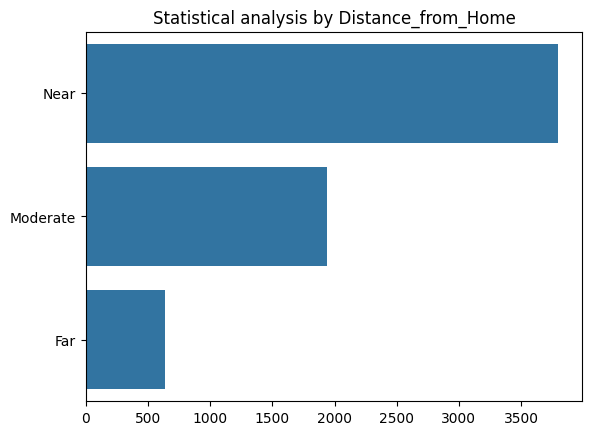

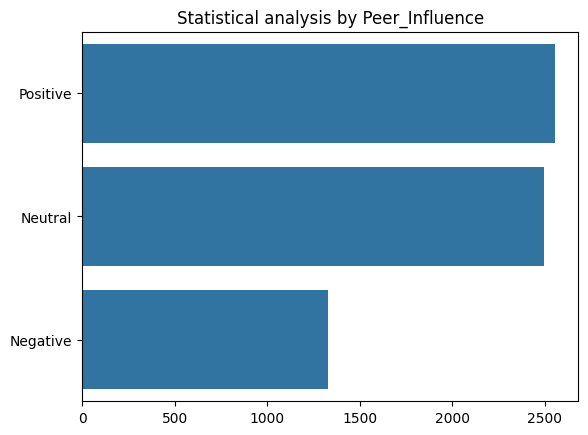

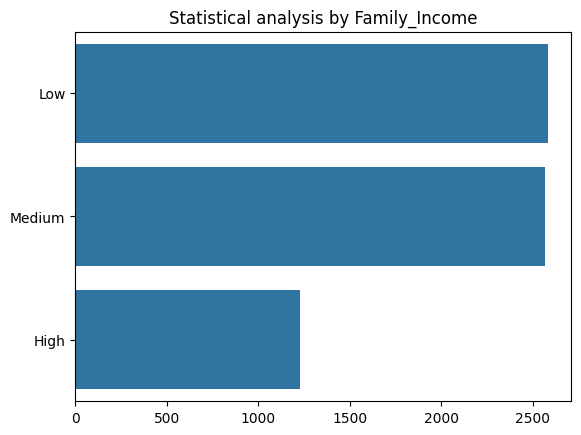

In [37]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

Bar charts of categorical data types are presented.

According to them, the average student has good Internet access, he has no problems with learning, studies at a public school near home, his teachers are not bad, and his peers generally do not have a negative impact.

Pie Chart - Analysis of relative frequencies

In [38]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

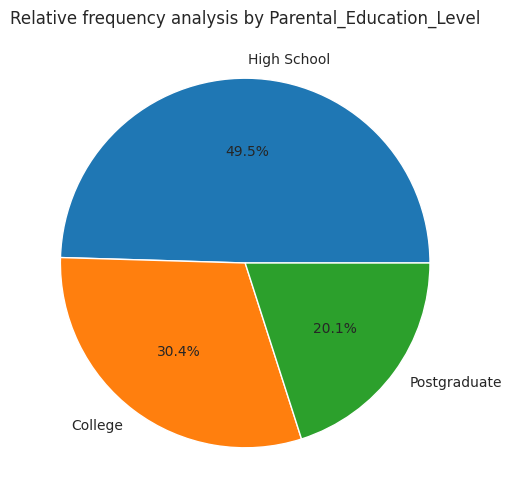

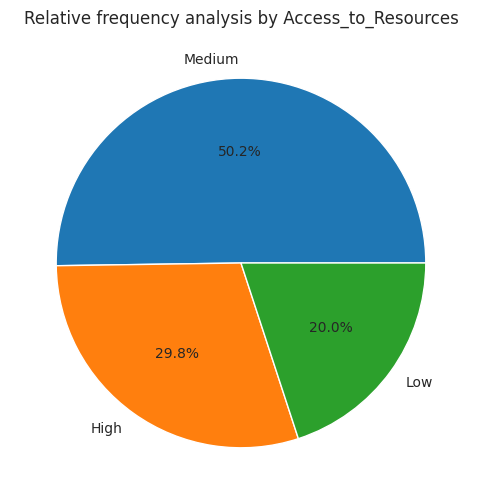

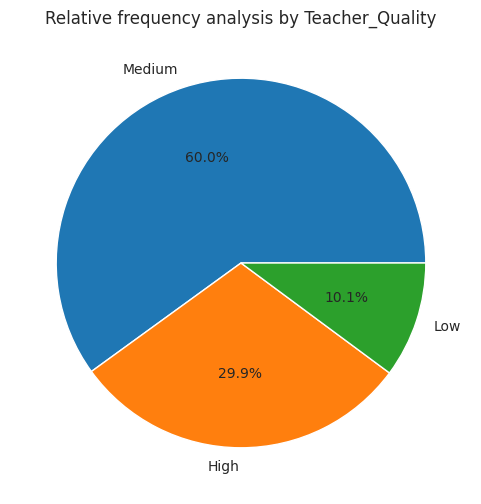

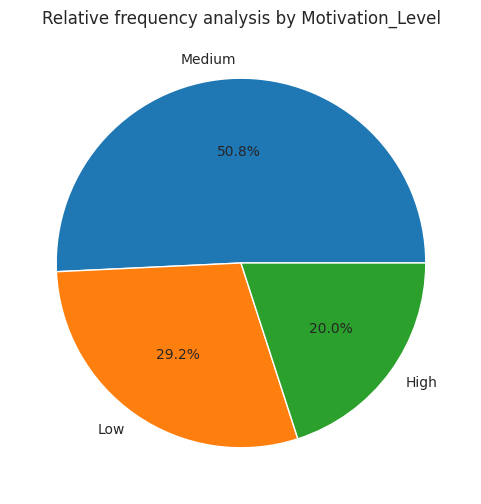

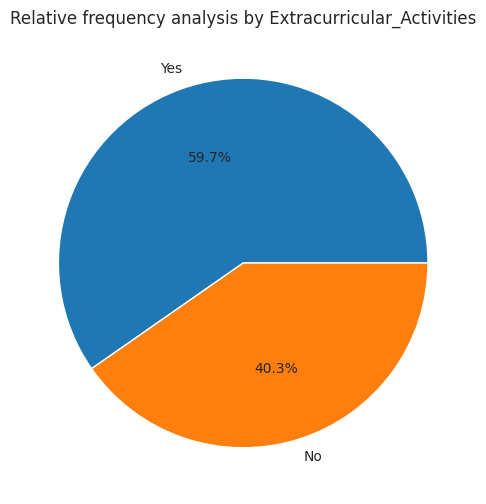

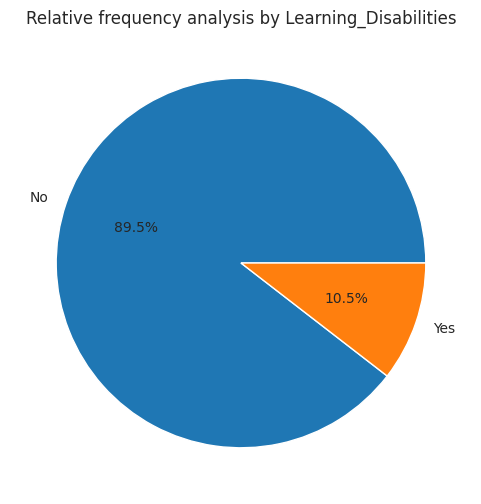

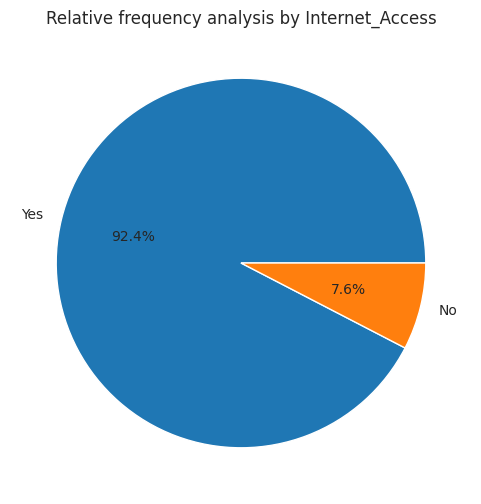

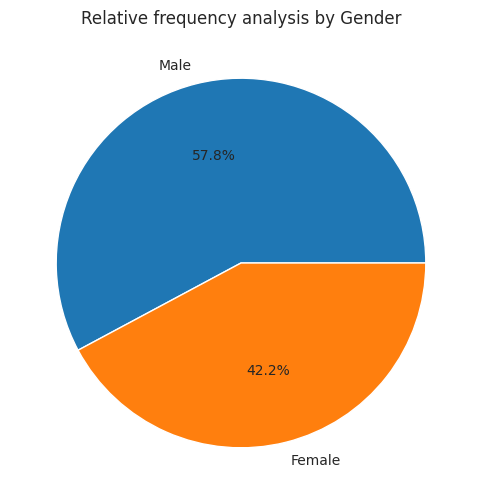

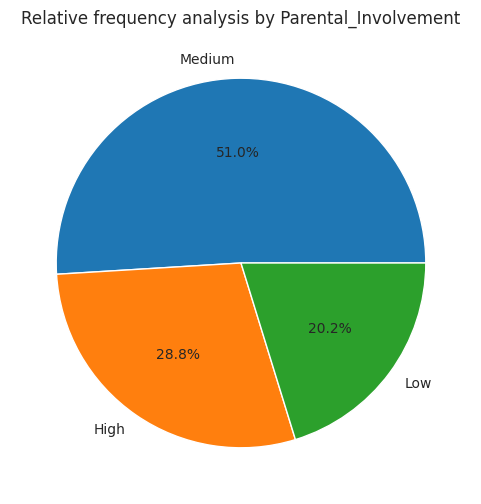

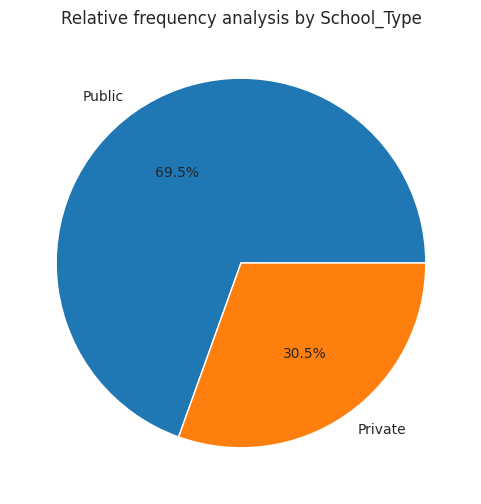

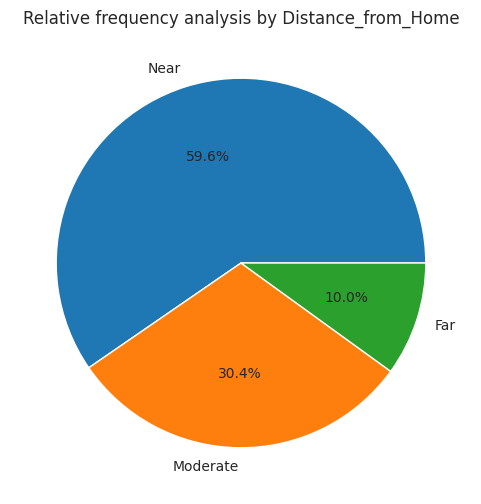

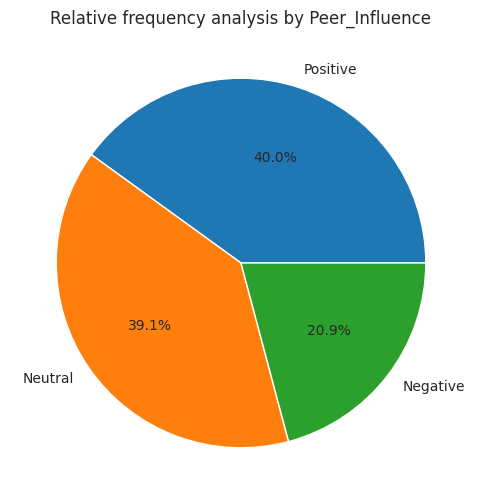

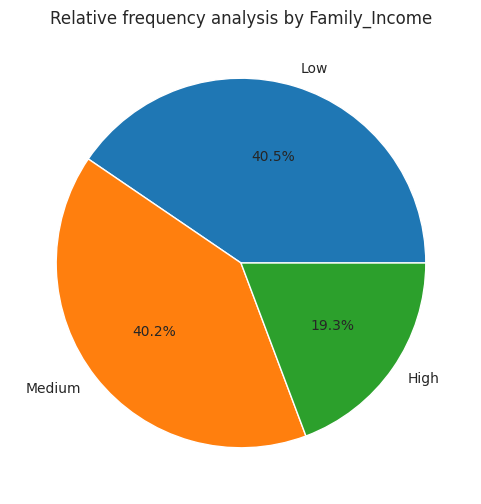

In [39]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

Pie charts of categorical data types are presented.

According to them, the average student has good Internet access, he has no problems with learning, studies at a public school near home, his teachers are not bad, and his peers generally do not have a negative impact.

Statistical Analysis for subgroups

In [40]:
# create groups organized by sex and income
group_gerder_learndisabilities = dataset.groupby(["Gender", "Learning_Disabilities"]).size().reset_index(name = "samples")
print(group_gerder_learndisabilities)

   Gender Learning_Disabilities  samples
0  Female                    No     2388
1  Female                   Yes      302
2    Male                    No     3322
3    Male                   Yes      366


In [41]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Gender')
    plt.ylabel('Learning_Disabilities')
    plt.title('Bar Chart of Gender by Learning_Disabilities')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


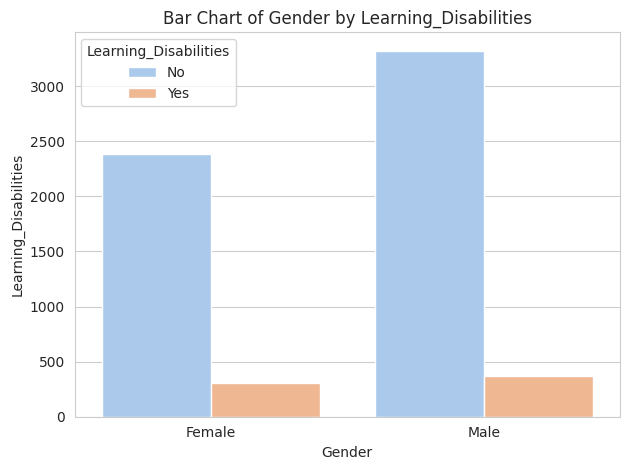

In [42]:
plot_absfreq_groups(group_gerder_learndisabilities, "Gender", "Learning_Disabilities")

The bar chart shows that most people have no difficulty learning. However, the amount of girls with learning difficulties is almost on par with men, despite the fact that there are more men

In [43]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + ': ' + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Gender and Learning_Disabilities')
    plt.show()

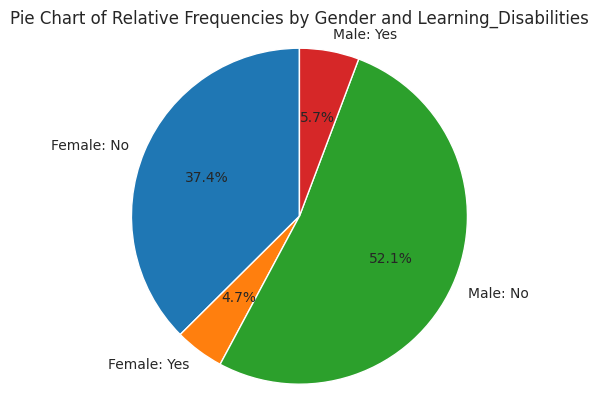

In [44]:
plot_relfreq_groups(group_gerder_learndisabilities, "Gender", "Learning_Disabilities")

The pie chart shows that most people have no difficulty learning. However, the percentage of girls with learning difficulties is almost on par with men, despite the fact that there are more men